In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("Liver_cirrhosis.csv")

df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [5]:
df.shape , df.columns


((25000, 19),
 Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
        'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
        'Stage'],
       dtype='object'))

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [7]:
df.isnull().sum()


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns


In [9]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [10]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [11]:
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221.0,0,1,18499.0,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1.0
1,1230.0,0,1,19724.0,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2.0
2,4184.0,0,1,11839.0,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2.0
3,2090.0,2,1,16467.0,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2.0
4,2105.0,2,1,21699.0,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1.0


In [12]:
X = df.drop("Stage", axis=1)
y = df["Stage"]


In [13]:
X.shape , y.value_counts()


((25000, 18),
 Stage
 2.0    8441
 3.0    8294
 1.0    8265
 Name: count, dtype: int64)

In [19]:
y = y - 1


In [20]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [21]:
X_train , X_test , y_train , y_test = train_test_split(
    X_scaled , y ,
    test_size = 0.2 ,
    random_state = 42 ,
    stratify = y
)


In [22]:
log_model = LogisticRegression(max_iter=2000)

log_model.fit(X_train , y_train)

log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test , log_pred)

log_acc


0.5786

In [23]:
rf_model = RandomForestClassifier(
    n_estimators = 300 ,
    max_depth = 15 ,
    random_state = 42
)

rf_model.fit(X_train , y_train)

rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test , rf_pred)

rf_acc


0.9472

In [24]:
xgb_model = XGBClassifier(
    n_estimators = 400 ,
    max_depth = 6 ,
    learning_rate = 0.05 ,
    subsample = 0.9 ,
    colsample_bytree = 0.9 ,
    random_state = 42
)

xgb_model.fit(X_train , y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test , xgb_pred)

xgb_acc


0.957

In [25]:
models = pd.DataFrame({
    "Model" : ["Logistic" , "RandomForest" , "XGBoost"],
    "Accuracy" : [log_acc , rf_acc , xgb_acc]
})

models.sort_values("Accuracy" , ascending=False)


,Model,Accuracy
2,XGBoost,0.9570
1,RandomForest,0.9472
0,Logistic,0.5786


In [26]:
best_pred = xgb_pred


In [27]:
print(classification_report(y_test , best_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1653
         1.0       0.94      0.96      0.95      1688
         2.0       0.97      0.97      0.97      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



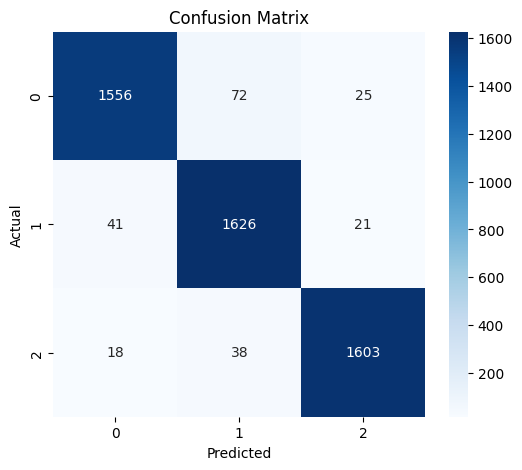

In [28]:
cm = confusion_matrix(y_test , best_pred)

plt.figure(figsize=(6,5))

sns.heatmap(
    cm ,
    annot=True ,
    fmt="d" ,
    cmap="Blues"
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()


In [29]:
importance = xgb_model.feature_importances_

imp_df = pd.DataFrame({
    "Feature" : X.columns ,
    "Score" : importance
}).sort_values("Score" , ascending=False)

imp_df.head(10)


,Feature,Score
6,Hepatomegaly,0.161823
17,Prothrombin,0.073671
8,Edema,0.070063
5,Ascites,0.060590
0,N_Days,0.060101
16,Platelets,0.058124
11,Albumin,0.054696
13,Alk_Phos,0.050325
12,Copper,0.048827
14,SGOT,0.044860


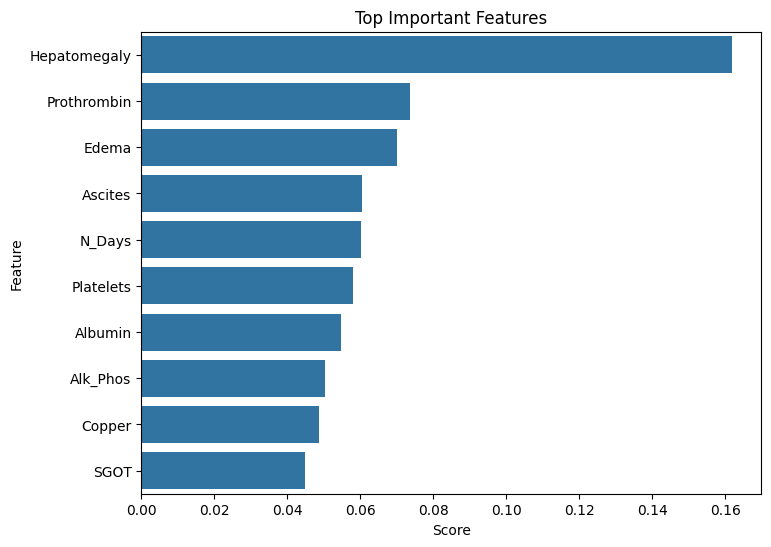

In [30]:
plt.figure(figsize=(8,6))

sns.barplot(
    data = imp_df.head(10),
    x = "Score",
    y = "Feature"
)

plt.title("Top Important Features")
plt.show()


In [31]:
import pickle

pickle.dump(xgb_model , open("model.pkl","wb"))
pickle.dump(scaler , open("scaler.pkl","wb"))


In [32]:
def predict_stage(data):

    model = pickle.load(open("model.pkl","rb"))
    scaler = pickle.load(open("scaler.pkl","rb"))

    data = np.array(data).reshape(1,-1)

    data = scaler.transform(data)

    pred = model.predict(data)

    return int(pred[0])


In [33]:
sample = X.iloc[0].values

predict_stage(sample)


0